## Career Paths of NASA Prize Fellows

Eric Bellm

January 2016

\#hackAAS

In [1]:
from StringIO import StringIO
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Load the data from a Google Sheet.  You can view it and suggest edits [here](https://docs.google.com/spreadsheets/d/1EVYbK92kJre6aAnDzYVsj_EdpfG9a4qo2ZBjnnumME0/edit?usp=sharing).  

The fellow names, years, and institutions are compiled from:

[Hubble](http://www.stsci.edu/institute/smo/fellowships/hubble/fellows-list/)
[Spitzer](http://irsa.ipac.caltech.edu/data/SPITZER/docs/spitzermission/communityprograms/spitzerfellows/)
[Einstein](http://cxc.harvard.edu/fellows/allFellowsList.html)
[Sagan](http://nexsci.caltech.edu/sagan/postdocRecipients.shtml)

In [2]:
r = requests.get('https://docs.google.com/spreadsheets/d/1EVYbK92kJre6aAnDzYVsj_EdpfG9a4qo2ZBjnnumME0/export?format=csv')
data = r.content

In [5]:
df = pd.read_csv(StringIO(data))

In [27]:
df.columns

Index([u'Fellowship Year', u'Fellowship', u'Name', u'PhD Institution',
       u'PhD Year', u'Host Institution', u'Gender', u'Previous Position',
       u'Previous Institution', u'Next Position', u'Next Institution',
       u'Start of Next Position', u'Current Position', u'Current Institution'],
      dtype='object')

In [17]:
df.sort('Fellowship Year',inplace=True)
df['count'] = 1

Set up some plotting preferences:

In [7]:
sns.set_style('ticks')
sns.set_context('talk',font_scale=1.5)

def outside_legend():
    # Shink current axis by 20%
    ax=plt.gca()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return lgd

category20=['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728',
            '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2',
            '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
category10=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
    '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(category10,n_colors=10)

Let's start by looking at the raw number of prize postdocs by program:

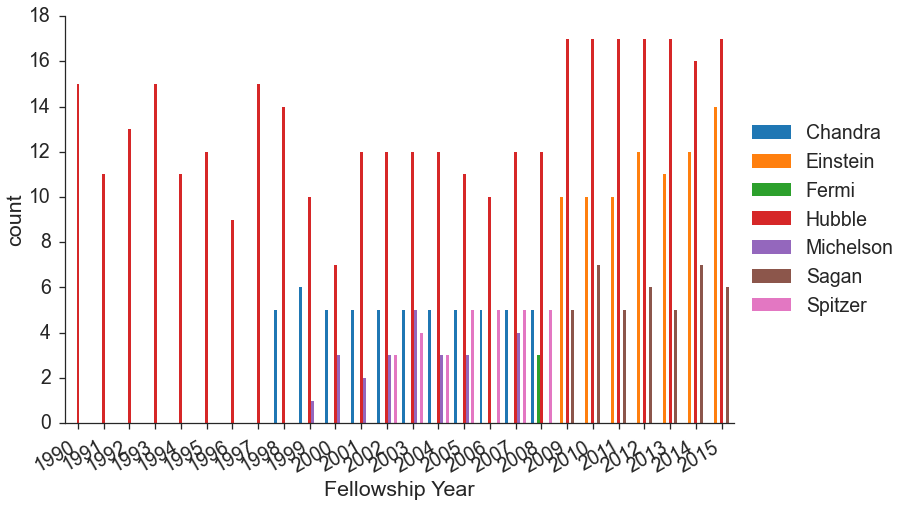

In [39]:
fig = plt.figure()
sns.barplot(x='Fellowship Year',data=df,hue="Fellowship")
sns.despine()
outside_legend()
fig.autofmt_xdate()

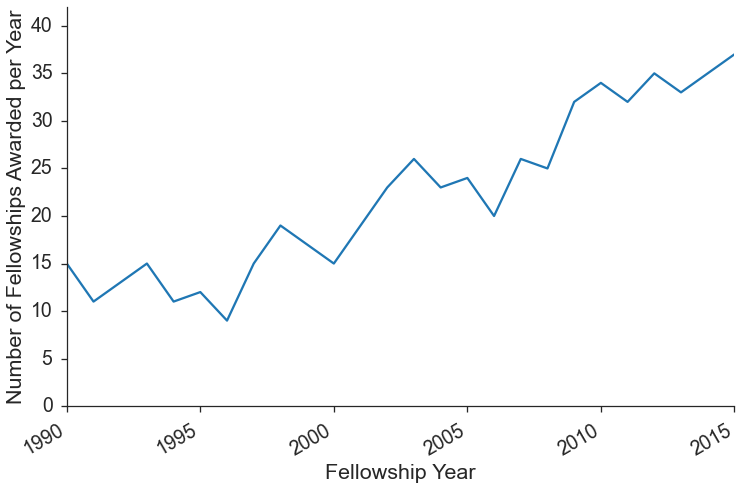

In [32]:
fig = plt.figure()
grp = df.groupby('Fellowship Year')
dfg = grp.agg(np.sum)
plt.plot(dfg.index,dfg['count'])
plt.xlabel('Fellowship Year')
plt.ylabel('Number of Fellowships Awarded per Year')
plt.ylim([0,dfg['count'].max()+5])
sns.despine()
fig.autofmt_xdate()

How many distinct fellowships are offered by year?

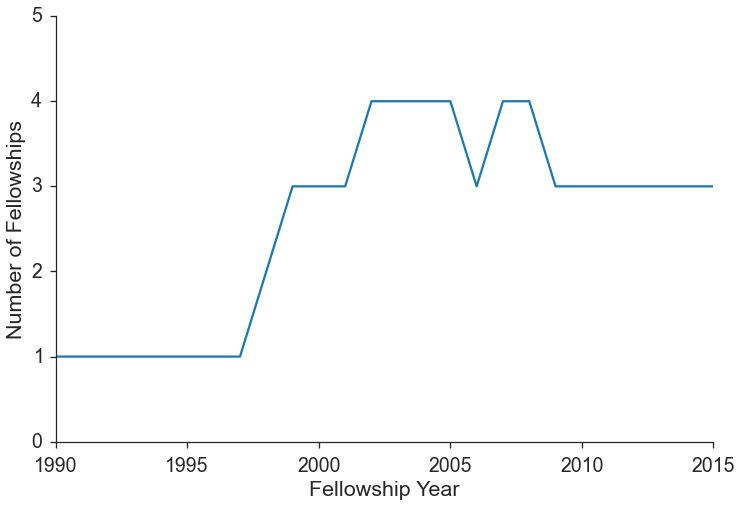

In [39]:
grp = df.groupby('Fellowship Year')
n_fellowships = []
years = []
for yr, group in grp:
    years.append(yr)
    n_fellowships.append(len(set(group['Fellowship'])))
plt.plot(years,n_fellowships)
plt.ylim(0,5)
plt.xlabel("Fellowship Year")
plt.ylabel("Number of Fellowships")
sns.despine()

Let's look at how many years have elapsed between the fellows' PhD year and the year they start their fellowship.  Note that these data are not (yet) complete, as the raw data sources do not always include the PhD year.

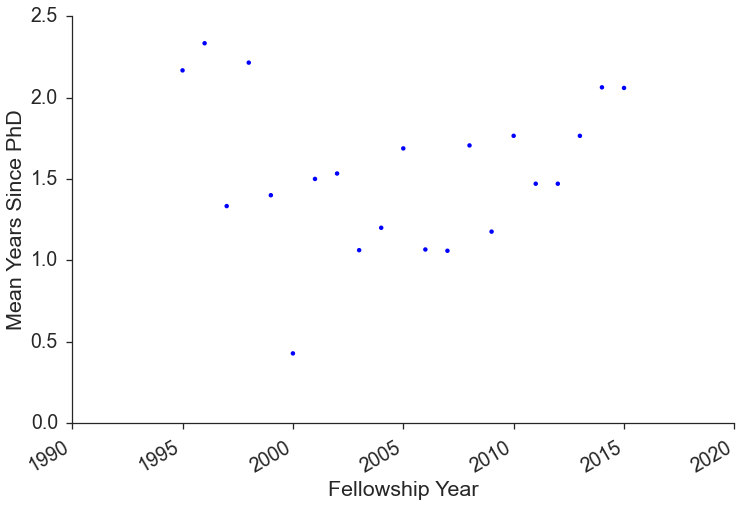

In [9]:
fig = plt.figure()
df['years_since_PhD'] = df['Fellowship Year'] - df['PhD Year']
grp = df.groupby('Fellowship Year')
dfg = grp.agg(np.mean)
plt.scatter(dfg.index,dfg['years_since_PhD'])
plt.xlabel('Fellowship Year')
plt.ylabel('Mean Years Since PhD')
sns.despine()
fig.autofmt_xdate()

(todo: boxplot or stripplot)

Let's look at some aggregates to find the top PhD and host institutions.  Note that we still need to clean the input data to match institution names written out differently.

In [29]:
grp = df.groupby('Host Institution')
dfg = grp.agg(np.sum)['count'].copy()
dfg.sort(inplace=True)
dfg[::-1][:10]

Host Institution
California Institute of Technology                       37
University of Arizona                                    23
Princeton University                                     23
University of California, Berkeley                       23
University of California, Santa Cruz                     21
Massachusetts Institute of Technology                    20
Smithsonian Astrophysical Observatory                    18
Princeton, Institute for Advanced Study                  18
Harvard University                                       17
Observatories of the Carnegie Institute of Washington    15
Name: count, dtype: int64

In [30]:
grp = df.groupby('PhD Institution')
dfg = grp.agg(np.sum)['count'].copy()
dfg.sort(inplace=True)
dfg[::-1][:10]

PhD Institution
California Institute of Technology       27
Princeton University                     24
University of California, Berkeley       24
Harvard University                       22
University of Arizona                    20
University of California, Santa Cruz     14
University of Cambridge                  10
Yale University                           9
Massachusetts Institute of Technology     9
The Ohio State University                 9
Name: count, dtype: int64

(todo: network plot)

Can we find individuals who had two fellowships?  We don't expect this to start before ~2000, as multiple NASA fellowships weren't offered before 1998.

In [66]:
df['std_name'] = df['Name'].str.split('\s+').str[0].str[0]+df['Name'].str.split('\s+').str[-1]
grp = df.groupby('std_name')
dfg = grp.agg(np.sum)
w = dfg['count'] > 1
print np.sum(w)
double_winners = dfg.ix[w].index

21


In [68]:
double_years = []
for dw in double_winners:
    w = df['std_name'] == dw
    double_years.append(df[w]['Fellowship Year'].max())

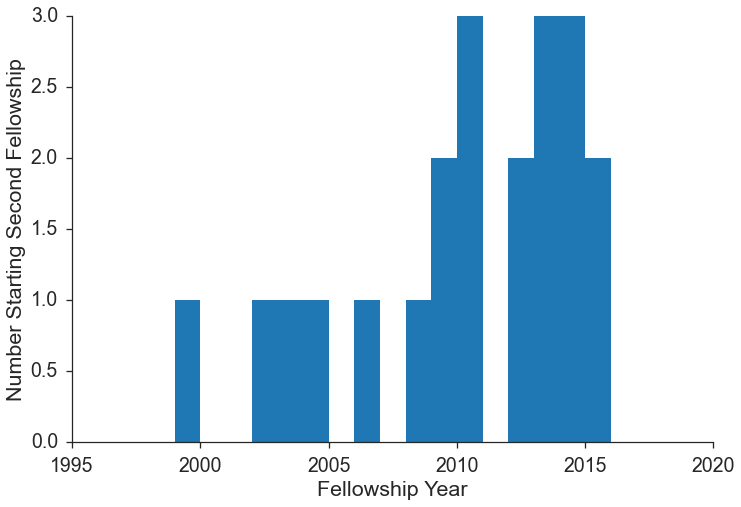

In [83]:
plt.hist(double_years,bins=np.linspace(1997,2016,20))
plt.xlabel('Fellowship Year')
plt.ylabel('Number Starting Second Fellowship')
sns.despine()

We see a sharp increase in fellows taking a second fellowship after the financial crisis.